<a href="https://colab.research.google.com/github/AkiraNom/data-analysis-notebook/blob/main/EDA_JOLTS_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NFP and JOLT

JTSJOL:  Job Openings: Total Nonfarm, number <br>
JTSJOR:  Job Openings: Total Nonfarm, rate  <br>
JTSHIL:  Hires: Total Nonfarm <br>
PAYEMS:  All Employees, Total Nonfarm (NFP) <br>

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import datetime
import seaborn as sns

%matplotlib inline

In [41]:
# set date to retrieve
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime.today()

# retrieve non-farm payroll and jolts data
df_employ =pdr.DataReader(['PAYEMS','JTSJOL'],'fred',start,end)
df_employ = df_employ.rename(columns={'PAYEMS': 'NFP','JTSJOL':'JOLT'})
df_employ

,NFP,JOLT
DATE,,
2010-01-01,129798,2837.0
2010-02-01,129700,2666.0
2010-03-01,129864,2679.0
2010-04-01,130115,3153.0
2010-05-01,130645,2988.0
...,...,...
2022-12-01,154535,11234.0
2023-01-01,155007,10563.0
2023-02-01,155255,9974.0


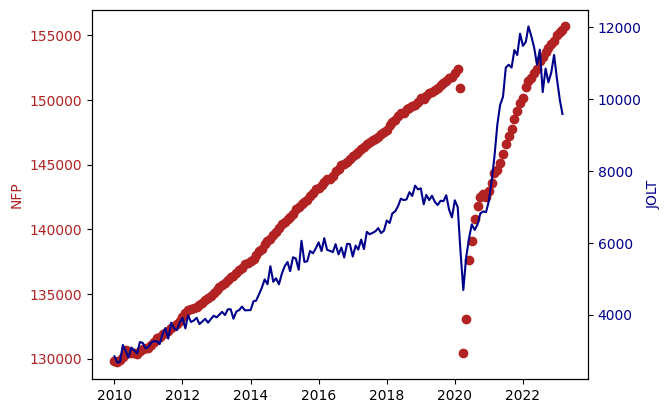

In [49]:
fig, ax1 = plt.subplots() 
   
ax1.set_ylabel('NFP',color='firebrick') 
ax1.scatter(df_employ.index,df_employ['NFP'], color = 'firebrick') 
ax1.tick_params(axis ='y', labelcolor = 'firebrick') 

ax2 = ax1.twinx() 
  
ax2.set_ylabel('JOLT',color='darkblue') 
ax2.plot(df_employ.index,df_employ['JOLT'],color='darkblue') 
ax2.tick_params(axis ='y', labelcolor = 'darkblue') 


It seems that JOLTs data proceeds the NFP especially after the COVID pandemic.

Text(0, 0.5, 'JOLT')

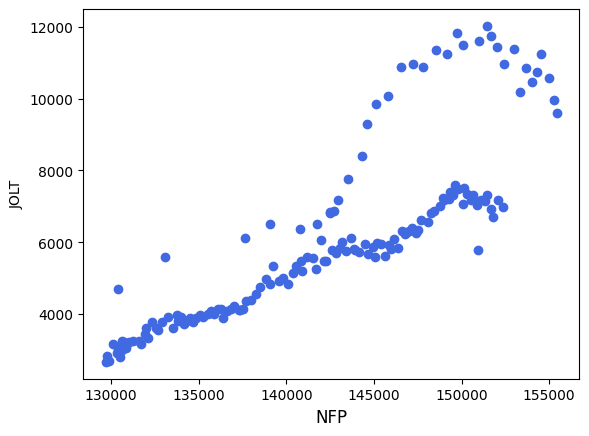

In [43]:
ax = plt.scatter(df_employ['NFP'],df_employ['JOLT'],color='royalblue')

plt.xlabel('NFP',fontsize=12)
plt.ylabel('JOLT')

In [44]:
# correlation
df_employ.corr()

,NFP,JOLT
NFP,1.00000,0.85035
JOLT,0.85035,1.00000


<Axes: >

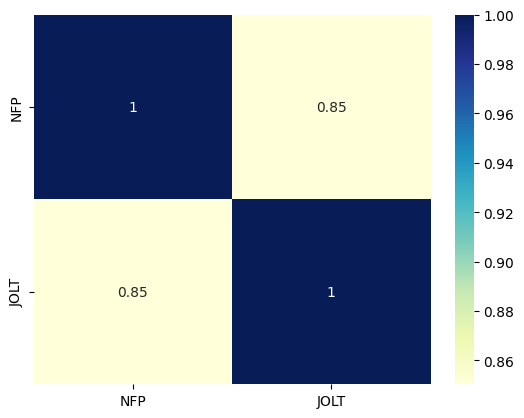

In [45]:
sns.heatmap(df_employ.corr(), cmap="YlGnBu", annot=True)

# Retrive Data from [JOLTS_BLS](https://www.bls.gov/news.release/jolts.htm)

If you are interested in details of JOLTS figures,

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

In [ ]:
# retrieve data from jolts_bls
url = 'https://www.bls.gov/news.release/jolts.htm'
table = pd.read_html(url)

In [ ]:
# check number of table in the page
print('Total tables: ', len(table))

Total tables:  26


In [ ]:
# set names to extract data from the tables
table_dict = { 0: 'job_opening_rate',
               1: 'hiring_rate',
               3: 'quit_rate',
               4: 'layoff_rate'
              }

In [ ]:
# flatten multi level index 
def flatten_multiIndex(df):
  df.columns = df.columns.droplevel()
  return df

In [ ]:
jolts_data = {}

# extract each data from the table and store in the dict.
for key, item in table_dict.items():
  df = flatten_multiIndex(table[key])
  
  if key ==0 :
    jolts_data['industry']=df.loc[:,'Industry and region'].tolist()  

  jolts_data[item]=df.loc[:,'Jan.2023(p)'].iloc[:,1].tolist()

In [ ]:
# create a dataframe
df_jolts = pd.DataFrame(jolts_data).dropna()
df_jolts

,industry,job_opening_rate,hiring_rate,quit_rate,layoff_rate
0,Total,6.5,4.1,2.5,1.1
2,Total private,6.9,4.5,2.8,1.2
3,Mining and logging,5.6,3.9,2.5,0.8
4,Construction,3.0,5.0,2.2,2.2
5,Manufacturing,5.8,3.2,2.0,0.9
6,Durable goods,5.5,2.8,1.8,0.7
7,Nondurable goods,6.3,4.0,2.4,1.1
8,"Trade, transportation, and utilities",5.9,4.6,3.4,1.1
9,Wholesale trade,5.0,3.1,1.7,1.0
10,Retail trade,5.3,5.0,4.1,0.9


In [ ]:
# define labor segments/sectors to plot
selected_segment = ['Construction', 
                    'Durable goods','Nondurable goods', 
                    'Wholesale trade', 'Retail trade',
                    # 'Transportation, warehousing, and utilities', 
                    'Information',
                    'Financial activities', 
                    'Education and health services',
                    'Professional and business services',
                    'Arts, entertainment, and recreation','Accommodation and food services']

# remove notes and footnotes at the end of the dataframe
df_plot=df_jolts.set_index('industry').iloc[:-2,]

# change data type
df_plot = df_plot.astype({'job_opening_rate': float,	
                     'hiring_rate':float,	
                     'quit_rate': float,
                     'layoff_rate': float
                    })

# subset data to plot
df_plot = df_plot.loc[selected_segment]

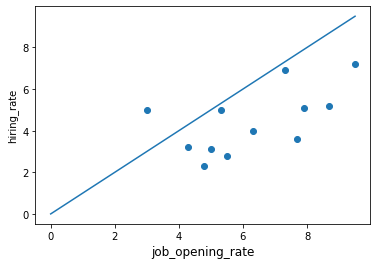

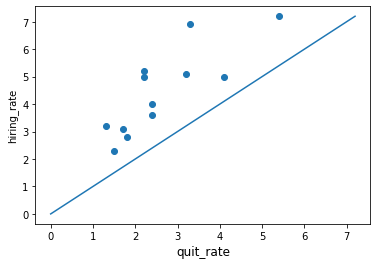

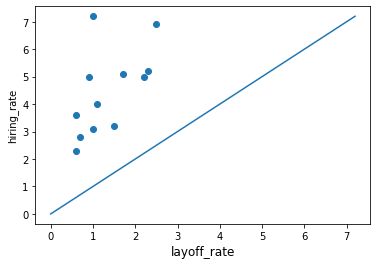

In [ ]:
# plot correlation between hiring rate and other values
plot_items = ['job_opening_rate','quit_rate','layoff_rate']
for i in plot_items:
  fig, ax = plt.subplots()
  ax = plt.scatter(df_plot[i],df_plot['hiring_rate'])

  max_dimension = max(df_plot[i].max(),df_plot['hiring_rate'].max())

  ax = plt.plot(np.linspace(0,max_dimension),np.linspace(0,max_dimension))
  plt.xlabel(i,fontsize=12)
  plt.ylabel('hiring_rate')

In [ ]:
fig = px.scatter(df_plot, 
                 x="quit_rate",
                 y='hiring_rate', 
                 text=df_plot.index,
                #  labels={'hiring_rate':'Hiring rate','quit_rate':'Quits rate'},
                 opacity=0.5)

fig.update_traces(marker=dict(size=30),
                  # textposition='top center',
                  )


max_dimension = max(df_plot[i].max(),df_plot['hiring_rate'].max())
fig.add_shape(type="line",
    x0=0, y0=0, x1=max_dimension, y1=max_dimension,
    line=dict(
        color="grey",
        width=4,
        dash="dot",))

fig.update_layout(
    height=800,
    title_text='Strong labor market in January 2023',
    xaxis_title='Quit Rate',
    yaxis_title='Hiring Rate',
    font=dict(size=16)
)

fig.add_annotation(text=f"<i> <B>Source</B> : BLS-JOLTS </i>",
                  xref="paper", yref="paper",align='left',
                  x=0, y=-0.1, showarrow=False,font=dict(size=13,color='grey'))

fig.update_layout(plot_bgcolor="white")
fig.update_xaxes(showline=True, linewidth=2, linecolor='black')
fig.update_yaxes(showline=True, linewidth=2, linecolor='black')
fig.show()

In most sectors, inflow of labors continues even though Fed raised interest rates too quickly to fight against the historical inflation.  